# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


> I am using Python v.3.7

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# check shape of dataset
data.shape[0]

45222

In [3]:
# find number of instances > 50000
data.query('income == ">50K"').shape

(11208, 14)

In [4]:
data.query('income == "<=50K"').shape

(34014, 14)

In [5]:
# double checking
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

> Given that <=50K has 34014 instances in hte data and >50K has 11208 instanes in the data, this dataset is class imbalanced.  In my initial submission, I did not address this issue because I did not think it was highly imbalanced.  I was directed to this article to help me understand how to deal with class imbalanced data:
https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set.  I may implement one of these techniques in choosing my predictive models, however, this article is very helpful for my understanding of how to work with imbalanced data in the future.

In [6]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.query('income == ">50K"').shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.query('income == "<=50K"').shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k / data.shape[0])*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [8]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
education-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


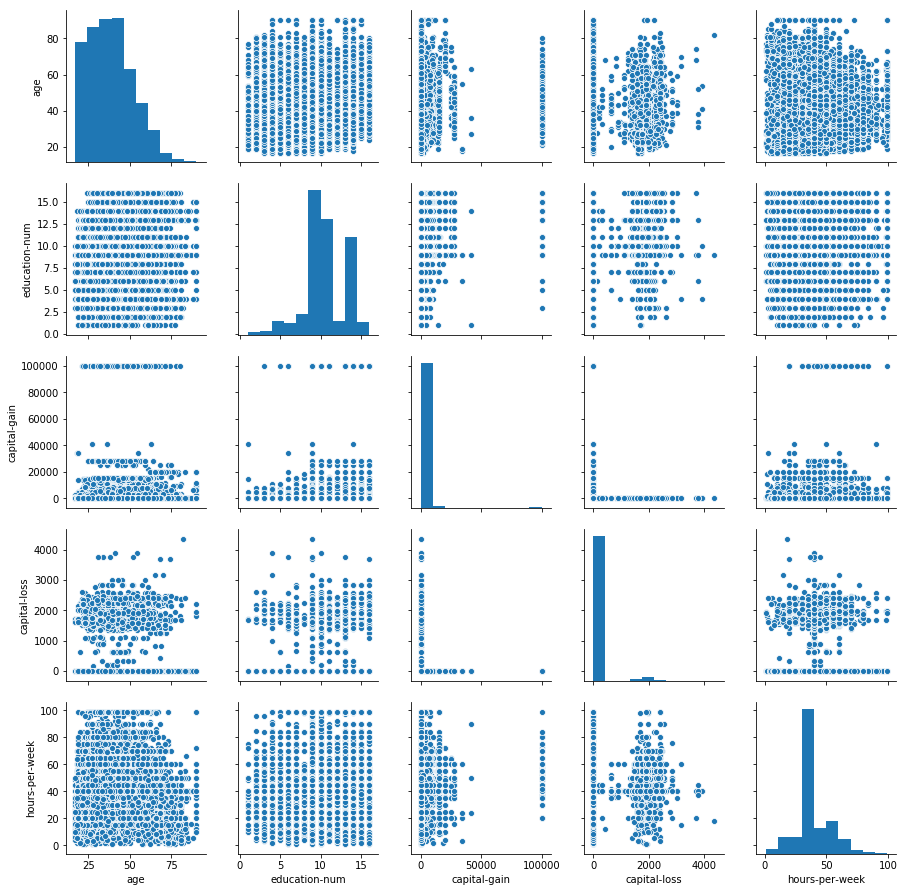

In [10]:
import seaborn as sns

sns.pairplot(data);

> I can see from the above visualization that the data is non-linear and from the correlation matrix, that there is no obvious multicollinearity.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


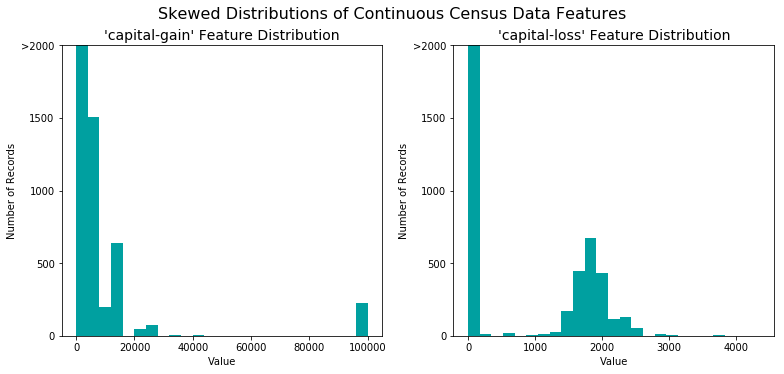

In [11]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [12]:
# dataset without income
features_raw.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


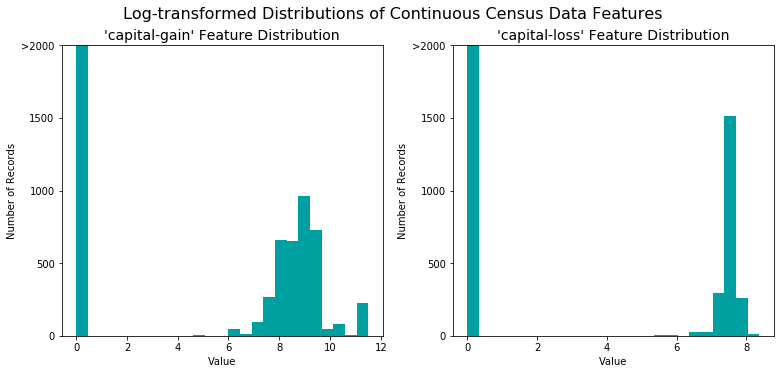

In [13]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [14]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [15]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

In [16]:
features_final.head(1)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.30137,0.8,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
income_raw.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [27]:
type(income_raw)

pandas.core.series.Series

In [20]:
# TODO: Encode the 'income_raw' data to numerical values
# income = income_raw.apply(lambda x : 0 if (x == "<=50K") else 1)

# a better way to encode labels (especially if there are multiple labels would be to use the following)
# this was suggested from Udacity reviewer after initial submission:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
income = encoder.fit_transform(income_raw)

In [29]:
# the above code turns income into an array which is fine but it changes the code below so 
# I will put it back into series format
income = pd.Series(income)
income.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [30]:
# checking the percentage of >50K
income.mean()

0.2478439697492371

In [31]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [34]:
TP = np.sum(income) 
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall

accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
B = 0.5
fscore = (1 + B**2) * ((precision * recall)/(((B**2) * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

### Answer:

#### Gaussian Naive Bayes:
* Describe one real-world application in industry where the model can be applied:
    - Gaussian Naive Bayes is a Machine Learning model that can be used for many different continuous variables data and one example of its use, and as the best choice in prediction, is in predicting DNA-Binding proteins and as the base model for Feature Selection (3).  We also often see it used in spam filtering as was seen in the practice lessons for this project (7).
* What are the strengths of the model; when does it perform well?
    - I learned that "no matter how strong the dependences among attributes are, naive Bayes can still be optimal if the dependences distribute evenly in classes, or if the dependences cancel each other out" (4).  This means that it assumes that all attributes are independent of one another.  
    - One area that it performs well is on small datasets also, even if there is correlation between variables (5).  Another advantage in the case of Spam filtering, is that it can learn and increase the weight for determining Spam on a case by case basis (7)
* What are the weaknesses of the model; when does it perform poorly?
    - In the case of Spam, these models can be tricked when spammers add large amounts of unfamiliar words. This can also be a problem in other datasets, as it may have a difficult time generalizing to new cases with unfamiliar values from the training set.
* What makes this model a good candidate for the problem, given what you know about the data?
    - Even though I learned that in practice, correlated features in datasets may not have much impact on the goodness of the Gaussian Naive Bayes model, I can see from data.corr() that the features do not have strong correlations with one another. This model also will provide probabilities predictions if I wanted to know how likely a person would be to make more than 50,000.

#### AdaBoost:
* Describe one real-world application in industry where the model can be applied:
    - I found that AdaBoost classifiers were used in Computer Vision for detecting defecting pecans (8) and performed the best according to accuracy measures vs SVM models.  It is commonly used for face detection (9).
* What are the strengths of the model; when does it perform well?
    - It performed well in improving classification for the above CV application in poorly performing NB models.  AdaBoost models performed fastest with highest accuracy in the example above.  I discovered that "AdaBoost is best used to boost the performance of decision trees on binary classification problems" (10).  
* What are the weaknesses of the model; when does it perform poorly?
    - I read that AdaBoost can be prone to overfitting (9) and I also read that it is not prone to overfitting (12) so this is inconsistent which could be considered a weakness in that there are mixed opinions about its potential to overfit.  Also, it can become a 'black box' algorithm, meaning that its explanability can be difficult in industry (11).  I learned that "AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost" (12).
* What makes this model a good candidate for the problem, given what you know about the data?
    - I think this is a good candidate for the problem because the data is relatively easy to implement and using a boosting method to perhaps improve Decision Tree performance should be simple to understand.  "AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting" (12).  I think it could be useful with the data improving weak learner predictions.
 
 
#### Support Vector Machine:
* Describe one real-world application in industry where the model can be applied:
    - SVM has been used to detect Breast Cancer from medical images (13).  SVM models can be used in text classification, Computer Vision, and Bioinformatics (14).
* What are the strengths of the model; when does it perform well?
    - SVM has been shown to generalize well, which is our goal in performing Machine Learning (15).  It has less of a risk of overfitting, which is in line with the generalizing well attribute, and SVMs utilize the kernel trick, which makes it useful to all different types of data, including non-linearly separated data (16). It performs well in high dimensional spaces, which we have with over 100 features after creating dummy variables (17).  It is memory efficient (17). 
* What are the weaknesses of the model; when does it perform poorly?
    - Some weaknesses of the model are that it can be difficult to choose a kernel, it can be complex and difficult to interpret and can take long in training (16).  It doesn't perform well when there is a lot of noise (17).  It also does not perform probability estimates (17).
* What makes this model a good candidate for the problem, given what you know about the data?
    - SVM could be a good choice for this dataset in that we have many features.  I do see that it could be slow, and hyperparameter tuning could be difficult. Although this dataset is somewhat large, it is not too large that this model should be extremely slow.  I will compare the model to the other two models.
    
    
    
### References:
1. https://www.quora.com/On-what-type-of-data-sets-we-should-use-Naive-Bayes-and-when-to-use-Gaussian-naive-Bayes-in-Machine-Learning
2. https://sebastianraschka.com/faq/docs/naive-bayes-vartypes.html
3. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0086703
4. https://www.aaai.org/Papers/FLAIRS/2004/Flairs04-097.pdf
5. https://stats.stackexchange.com/questions/23490/why-do-naive-bayesian-classifiers-perform-so-well
6. https://www.quora.com/Why-does-the-naive-Bayes-classifier-perform-well-even-when-the-features-are-correlated
7. https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering

8. https://www.sciencedirect.com/science/article/pii/S016816991100069X
9. https://towardsdatascience.com/boosting-and-adaboost-clearly-explained-856e21152d3e
10. https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
11. https://stats.stackexchange.com/questions/158382/when-should-i-not-use-an-ensemble-classifier
12. https://www.datacamp.com/community/tutorials/adaboost-classifier-python

13. https://arxiv.org/pdf/0912.2314.pdf
14. https://data-flair.training/blogs/applications-of-svm/
15. http://ce.sharif.ir/courses/85-86/2/ce725/resources/root/LECTURES/SVM.pdf
16. https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/
17. https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

18. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
19. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
20. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [35]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid th

SVC trained on 361 samples.
SVC trained on 3617 samples.


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


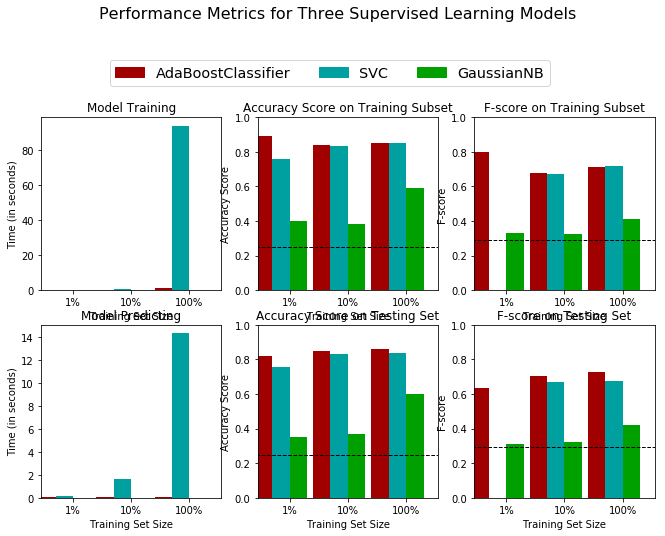

In [37]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = GaussianNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int (samples_100 * 0.1)
samples_1 = int (samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Answer:

> Based on the above evaluation, the model that performed the best given time, accuracy, and F1 score was AdaBoostClassifier.  I initially thought that this classifier would take longer than the other models, however, it was very fast and performed well on both the training and the test set, which tells me that it did not overfit the data.  It even performed well on the 1% dataset, so it is useful for smaller datasets.  
> * Metrics:
    - In looking at the F-score on the testing data when 100% of the training data was used tells us that AdaBoost outperformed the other models, including SVM by a small amount.  The F-score appears to be approximately 70% which is not bad, but I imagine with some tuning, it could be better.
> * Performance/training time:
    - I can see that the model that took the longest by far was SVM.  AdaBoost largely outperformed SVM, and was close in time to NB, although given the model performance metrics, Naive Bayes does not perform nearly as well as AdaBoost.
> * Suitability for the data:
    - AdaBoost seems to be appropriate for the data and can be used for binary classification problems\* and given that it improves sequentially by punishing the errors and utilizing weak learners, it is an excellent choice for minimizing errors and improving classification accuracy and other performance metrics.  I consider AdaBoost an appropriate choice for this data.


\* https://engineering.purdue.edu/kak/Tutorials/AdaBoost.pdf

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

### Answer:
> AdaBoost works by training a series of weak learners.  Weak learners are simple Machine Learning algorithms that are better than chance or guessing at the category of our target variable, or the feature that we are trying to determine, which in this case is income.  We know that weak learners are slightly better than guessing so if we were to use very simple learners that learn from the previous learner's mistakes, then each learner would improve and we could combine the learners at the end to get good results.  I will explain the combining process of learners in more detail below.  Typically AdaBoost will use a Decision Tree estimator with a depth of 1.  Decision Trees are simple Machine Learning algorithms that categorize the target variable given a set of rules at each level.  With a depth of 1, these Decision Tree algorithms will have only 1 decision point, so we can see that this decision point will classify some points correctly and likely many incorrectly, but it will be better than guessing.  We use shallow depths to avoid overfitting, which means that our model basically memorizes the training data and will not be very good at predicting the test data.  "Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model" (4).  
>
>In order to combine results from the weak learners, subsequent estimators learn from the previous weak learner by assigning a larger weight, or punishment, to the errors from the first weak learner.  What this means is that for all the False Positive and False Negative predictions, or the predictions that were predicted as positive but were actually negative and vice versa, in the previous weak learner, the next estimator will punish the model more by increasing the weights assigned for the misclassified points of the previous learner. This leads to estimators that are learning from their mistakes.  In the end, the ensemble task of AdaBoost, we combine all the weak learners into our final classification model.  We have the models 'vote' basically by combining their differing weights and after we combine these votes this gives us the structure of the positive areas and the negative areas and we are then able to create the classification boundary in order to make good predictions. 
>
> Another way to think of Boosting algorithms, is to think of a college course that is filled with students from all different majors.  An exam is given with questions from these various fields.  The psychology student does very well in the social sciences section but guesses at the physics questions, and the computer science student aces the technical section but is stumped at the communications section so randomly picks answers.  After grading the exams, the professor allows students to discuss results as a class and vote on the best answers as a whole.  We can see the results would improve and if this process was repeated over and over, eventually students would get excellent scores on the exam.  "A road to success is incomplete without any failures in life. Each failure teaches you something new and makes you stronger at each phase. Each time you make a mistake, it’s important to learn from it and try not to repeat it again" (5). 



1. https://classroom.udacity.com/nanodegrees/nd229/parts/a7ab8516-6980-4c4e-87f7-b19a975d809e/modules/aea22017-a8fe-4902-ba79-0d79f161a6bb/lessons/c21525c1-07f6-457c-a40e-64a95ba9ab73/concepts/331fb696-7767-4adb-b729-31972d00453f
2. https://stats.stackexchange.com/questions/124628/why-adaboost-with-decision-trees
3. https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30
4. https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248
5. https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5

\* Initial submission reviewer provided feedback for explaining model choice in layman's terms.  I have implemented these suggestions.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [38]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"n_estimators": [2, 5, 10, 50, 100],
              "learning_rate": [0.001, 0.01, 0.1, 0.5, 1, 10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cla

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8606
Final F-score on the testing data: 0.7316


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.8576           |     0.8606      |
| F-score        |  0.7246           |     0.7316      |


### Answer:
> The Accuracy of my unoptimized model was 0.8576, and my optimized model was 0.8606.  The F-score of my unoptimized model was 0.7246, and my optimized model was 0.7316.
> The scores for the optimized model were both slightly better.  I initially added more options for my parameters, however, I think with the large number of weak learners that I had in my n_estimators parameter, the model was taking a long time so I interrupted the kernel and created less values for the parameters.  I imagine that I could further optimize the model to improve F-score and Accuracy.
> These results are much improved over the naive predictor metrics: Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]  This tells me that this model is much better than if we predicted all incomes to be greater than 50,000.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [39]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
num_features_final = features_final.iloc[:, :5]
num_features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.667492,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959


In [41]:
data.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [42]:
data['income_num'] = income

In [43]:
data = data.drop('income', axis=1)

In [44]:
data.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_num
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0


In [45]:
# checking amounts of 1's in categorical vals
data.groupby('workclass')['income_num'].sum()

workclass
 Federal-gov          549
 Local-gov            915
 Private             7251
 Self-emp-inc         912
 Self-emp-not-inc    1059
 State-gov            520
 Without-pay            2
Name: income_num, dtype: int64

In [46]:
data.groupby('marital-status')['income_num'].sum()

marital-status
 Divorced                  655
 Married-AF-spouse          14
 Married-civ-spouse       9564
 Married-spouse-absent      54
 Never-married             701
 Separated                  99
 Widowed                   121
Name: income_num, dtype: int64

In [47]:
data.groupby('occupation')['income_num'].sum()

occupation
 Adm-clerical          756
 Armed-Forces            4
 Craft-repair         1355
 Exec-managerial      2867
 Farming-fishing       172
 Handlers-cleaners     135
 Machine-op-inspct     365
 Other-service         196
 Priv-house-serv         3
 Prof-specialty       2704
 Protective-serv       307
 Sales                1455
 Tech-support          411
 Transport-moving      478
Name: income_num, dtype: int64

In [48]:
data.groupby('relationship')['income_num'].sum()

relationship
 Husband           8507
 Not-in-family     1228
 Other-relative      50
 Own-child          105
 Unmarried          302
 Wife              1016
Name: income_num, dtype: int64

In [49]:
data.groupby('race')['income_num'].sum()

race
 Amer-Indian-Eskimo       53
 Asian-Pac-Islander      369
 Black                   534
 Other                    45
 White                 10207
Name: income_num, dtype: int64

In [50]:
data.groupby('sex')['income_num'].sum()

sex
 Female    1669
 Male      9539
Name: income_num, dtype: int64

In [51]:
data.groupby('native-country')['income_num'].sum()

native-country
 Cambodia                          9
 Canada                           60
 China                            36
 Columbia                          4
 Cuba                             34
 Dominican-Republic                5
 Ecuador                           6
 El-Salvador                      11
 England                          47
 France                           16
 Germany                          58
 Greece                           18
 Guatemala                         3
 Haiti                             9
 Holand-Netherlands                0
 Honduras                          2
 Hong                              8
 Hungary                           6
 India                            62
 Iran                             22
 Ireland                          10
 Italy                            33
 Jamaica                          14
 Japan                            31
 Laos                              2
 Mexico                           47
 Nicaragua             

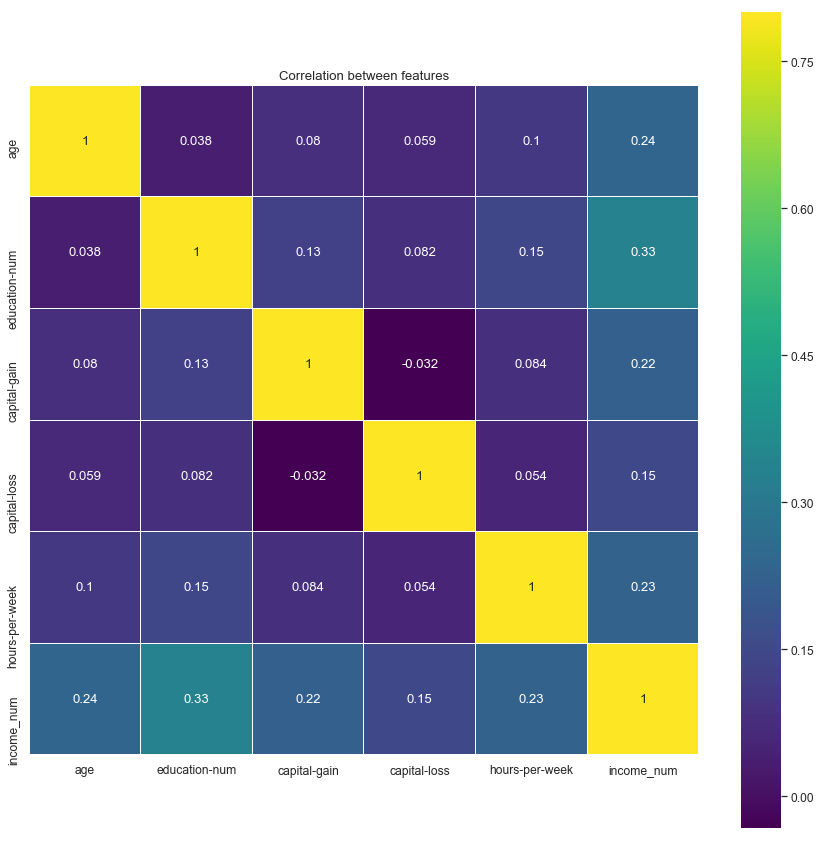

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)

corr_matrix = data.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

### Answer:

> From the above visualization and observing the groupings of categorical variables in relation to income, the features that seem to be most important are education-num, age, capital-gain, hours-per-week, maybe native-country, race, and sex.  There may be more features that are somewhat important but for the other features, there is either a very small correlation to income, or the groupings are varied enough for me to not think the feature would have a strong significance.  
> If I were to choose only 5 features, I would choose: 
* education-num
* age
* capital-gain
* hours-per-week
* sex
>
> I am ranking these features first based on R-values in the heatmap and then based on the groupings that show the most division among the categories, although there are a few of the categories that I could consider as I mentioned above.  These categories have imblanced counts of income over 50,000 vs <=50,000 among each category's values.  
>
> Also, as I considered the best features logically, I would assume the more education a person has would increase the liklihood of them earning more income.  Age would make a difference as well, as people tend to get raises or add skills over time which could improve earning potential.  Google dictionary defines capital-gain as "a profit from the sale of property or an investment" (1).  It makes sense that income would change based on the amount of capital-gain one has accumulated or lost.  Even though capital-loss does not have as high a correlation to income in the above heatmap visualization, it could also be a good candidate for best feature given my understanding of capital-gain.  Hours-per-week also makes sense logically, in that I would assume that more work hours would increase earning, although this may not always be true if people are working many low-income jobs to survive.  I chose sex as my final feature, but as I noted previously, I could have chosen some of the other categories based on their groupings.  I chose sex because I see a large discrepency between male/female workers in the income count.  This indicates gender pay gap issues.
>
>1. https://www.google.com/search?q=what+is+capital+gain&oq=what+is+capital+gain&aqs=chrome..69i57.2885j0j7&sourceid=chrome&ie=UTF-8


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [54]:
# checking the parameters that were chosen from GridSearchCV above:
best_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=0)

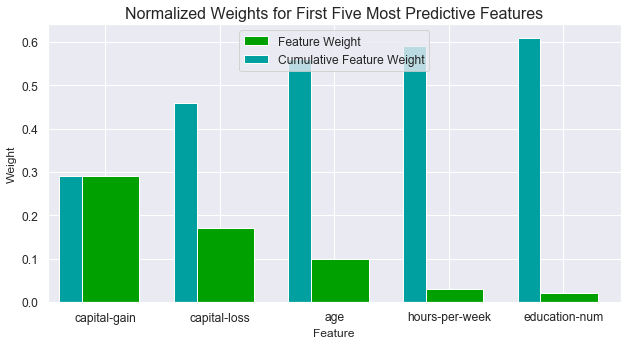

In [55]:
# TODO: Import a supervised learning model that has 'feature_importances_'
clf = AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=0)

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

> The reviewer for my initial submission suggested Recursive Feature Selection as a possible solution as well.  I also have learned wrapper methods for feature selection in past courses, which could be useful here as well.
>
>http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

> * How do these five features compare to the five features discussed in Question 6:
    - I was very close to determining the best features except I did not choose capital-loss, which appears to have the seconds largest percentage of individual feature weight.  I also chose sex as a significant feature and it was not chosen.
> * If you were close to the same answer, how does this visualization confirm your thoughts?
    - This visualization confirms my thoughts because it tells me that I had 4 of the 5 most significant features, by showing which features account for the most weight, or variability of income.  I did notice in my heatmap visualization that capital-loss correlation was somewhat correlated to income but less than some of the other features so I am a bit confused about that.
> * If you were not close, why do you think these features are more relevant?
    - I was pretty close, however, I chose some categorical variables and I'm curious if these were considered in the visualization or if only the numeric features were.  I will have to look more closely at the visualization file.  

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [79]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8606
F-score on testing data: 0.7316

Final Model trained on reduced data
------
Accuracy on testing data: 0.8325
F-score on testing data: 0.6752


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

### Answer:
> * How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
    - Both accuracy and F-score were reduced, although I would have to compute cross-validation and find mean and standard deviation to know if these are significant reductions in the scores in order to determine if it would be worth utilizing the reduced data.  Additionally, I thought that education-num would be the most significant feature for the data, however, in the visualization it is the least significant of the 5 features chosen.  
>
> * If training time was a factor, would you consider using the reduced data as your training set?
    - I would certainly consider using the reduced data as my training set, not only because the metrics are somewhat similar, but the model is much less complex with less features.  Less features is always preferable, as long as the models perform similarly well.  I would consider using the reduced data and continuing to perform hyperparameter tuning to see if I could improve the model with less features.  Going from 5 features vs. the 100+ features with dummy variables, reduces complexity quite a bit.  I would also like to use the reduced dataset to train other ensemble or perhaps neural network models in order to continue my comparison and to find the best model for predicting income.
>
> I'm also noting here that I did not address the imbalanced data issue with my final model and this could be affecting my metrics.  Although I have read different opinions about how to address imbalanced datasets, I would like to implement Random Forest w/SMOTE Boosting and XGBoost w/hyperparameter optimization as suggested in the article: https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set.  The final suggestion, SVM w/Cost Sensitive Training, does not sound appropriate for this dataset given the very slow training time.  I will further explore these techniques for future analyses. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.